In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
def overview():
    data = pd.read_csv("datasets_677484_1190624_agricultural_raw_material (1).csv")
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data

# assign a variable to overview()
data = overview()

The first 5 rows of data are:

<bound method NDFrame.head of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Pri

In [3]:
# Replace %, "," and "-"
data = data.replace('%', '', regex=True)
data = data.replace(',', '', regex=True)
data = data.replace('-', '', regex=True)
data = data.replace('', np.nan)
data = data.replace('MAY90', np.nan)

# Dropping rows with NaN values
data = data.dropna()

# Check to see if all NaN values are resolved
data.isnull().sum()

# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
data[lst] = data[lst].astype("float")

data.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [4]:
data.describe()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,626.775429,3.845307,530.047761,5.562362,1.620736,3.999663,849.440092,4.803497,249.253620,3.257914,...,510.027178,2.268466,1.663282,5.499755,164.662025,5.442454,291.283497,4.979663,678.212362,2.800000
std,299.992828,3.628820,264.001641,5.091321,0.533457,3.930971,285.248110,4.698225,68.553994,3.423842,...,93.188458,2.659446,1.068344,5.185055,25.519555,4.768734,33.929470,5.773700,158.315029,2.890238
min,247.090000,0.000000,182.000000,0.000000,0.820000,0.000000,417.470000,0.000000,133.280000,0.010000,...,335.250000,0.000000,0.490000,0.000000,119.350000,0.000000,183.610000,0.000000,384.000000,0.000000
25%,368.490000,1.300000,371.000000,1.895000,1.272500,1.377500,646.257500,1.557500,195.275000,1.190000,...,434.727500,0.402500,0.842500,1.617500,146.117500,2.152500,277.717500,1.905000,544.632500,0.662500
50%,526.890000,2.910000,449.500000,4.350000,1.540000,2.840000,747.555000,3.470000,247.550000,2.335000,...,512.495000,1.470000,1.335000,3.910000,160.430000,4.230000,294.975000,3.695000,662.160000,2.000000
75%,848.795000,5.157500,657.125000,7.775000,1.830000,5.407500,1016.352500,6.362500,287.025000,4.285000,...,582.035000,3.147500,2.157500,7.397500,180.345000,7.457500,310.887500,6.122500,832.245000,4.107500
max,1391.470000,22.250000,1503.000000,31.820000,5.060000,23.640000,1865.440000,32.840000,520.810000,34.190000,...,751.810000,19.500000,6.260000,32.160000,259.970000,33.210000,372.600000,65.240000,966.490000,21.570000


In [5]:
data.Month  = pd.to_datetime(data.Month.str.upper(), format='%b%y', yearfirst=False)

# Indexing month
data = data.set_index('Month')

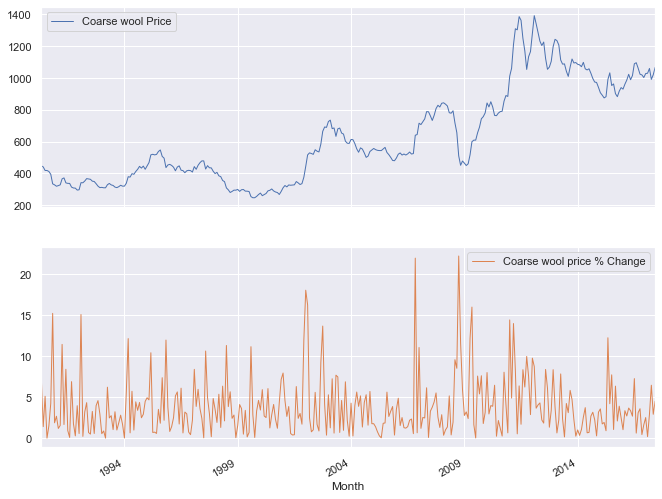

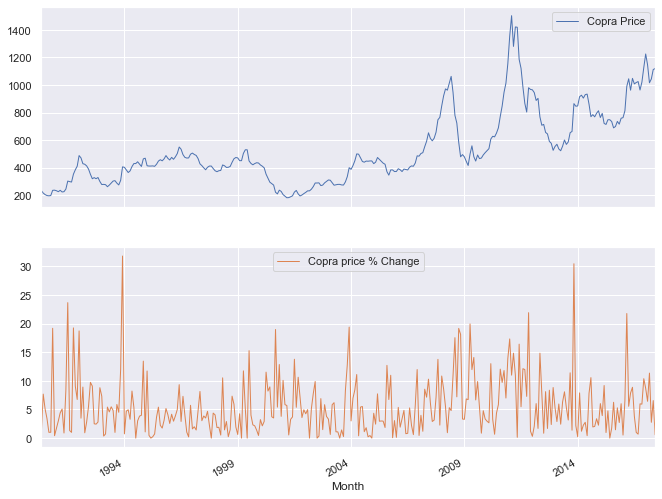

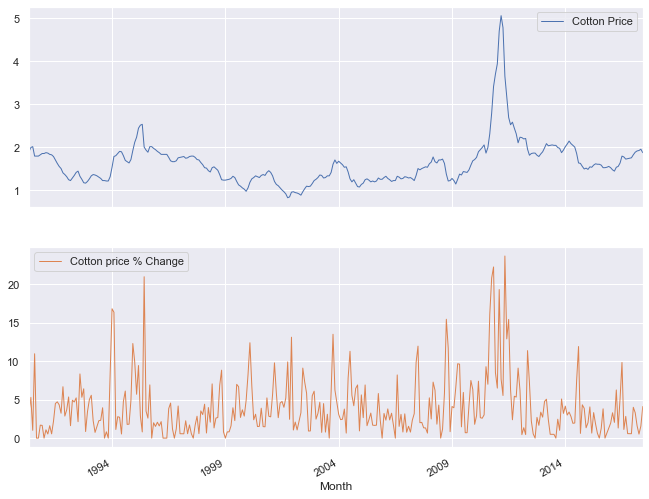

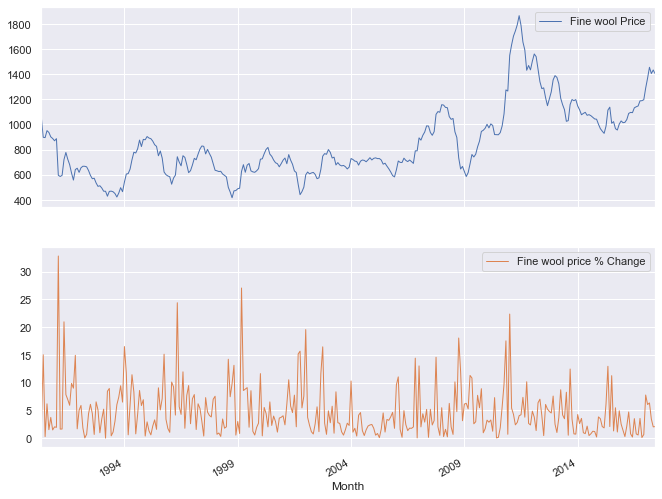

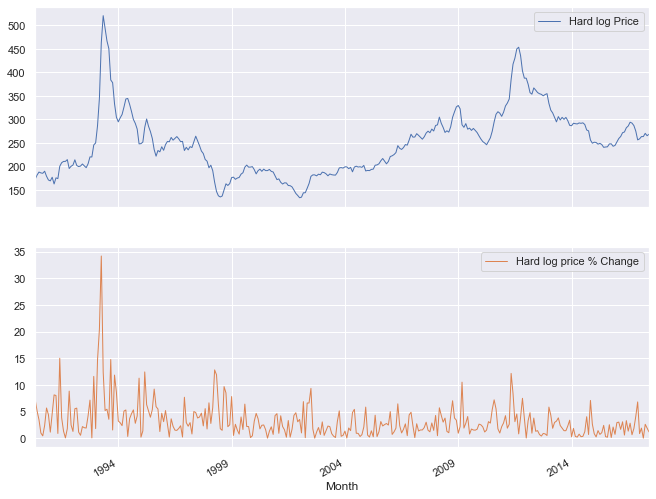

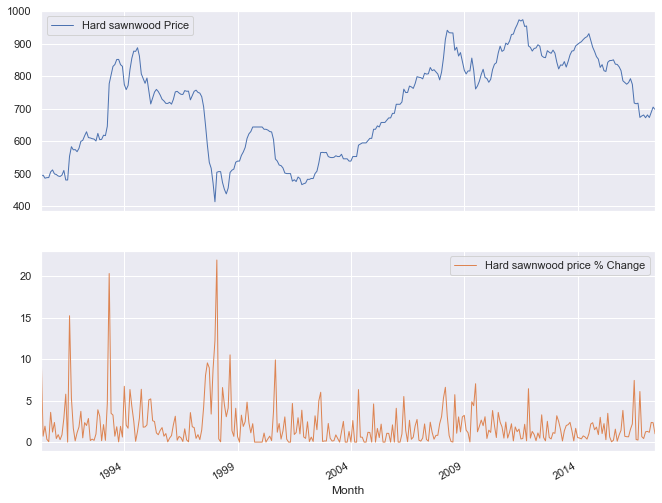

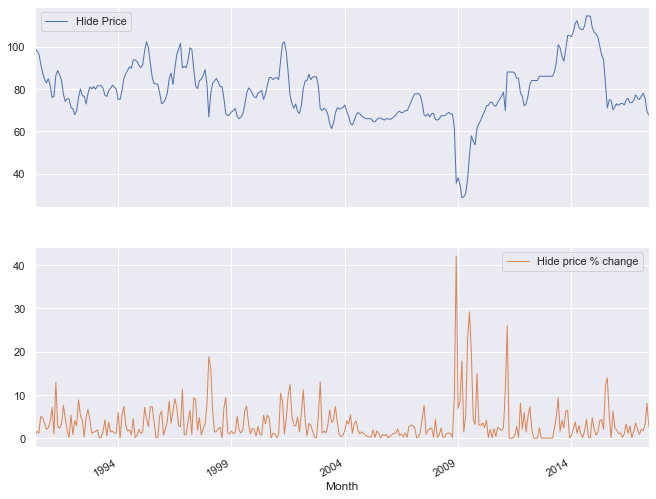

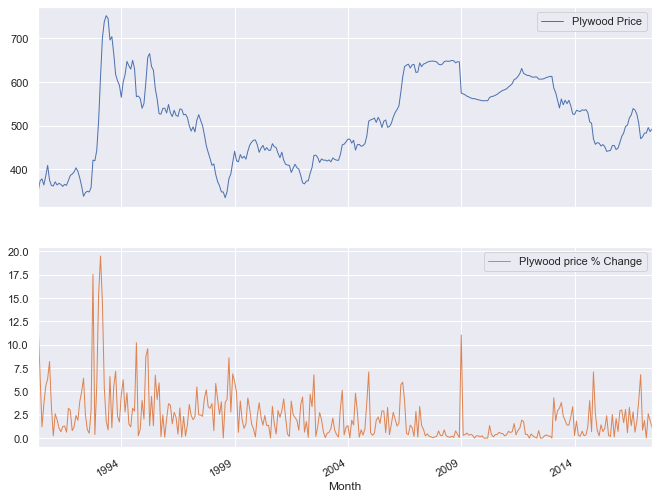

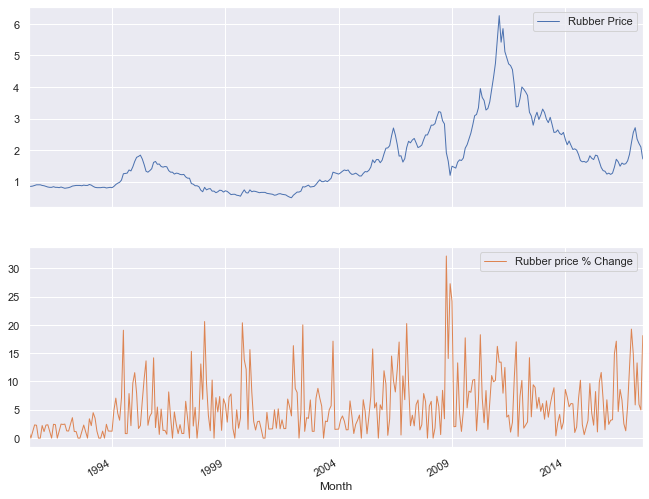

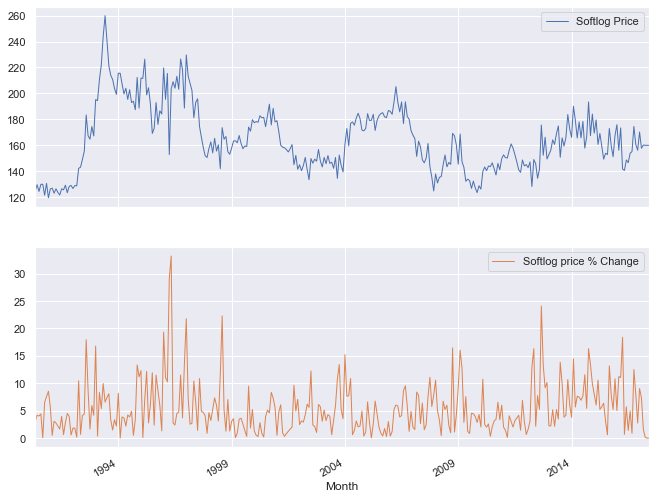

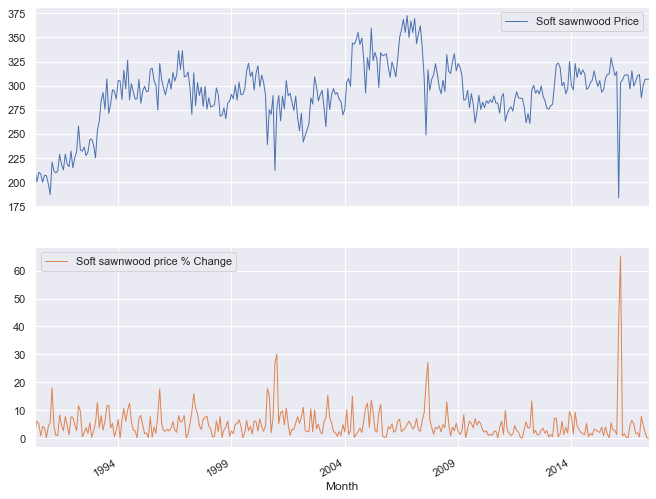

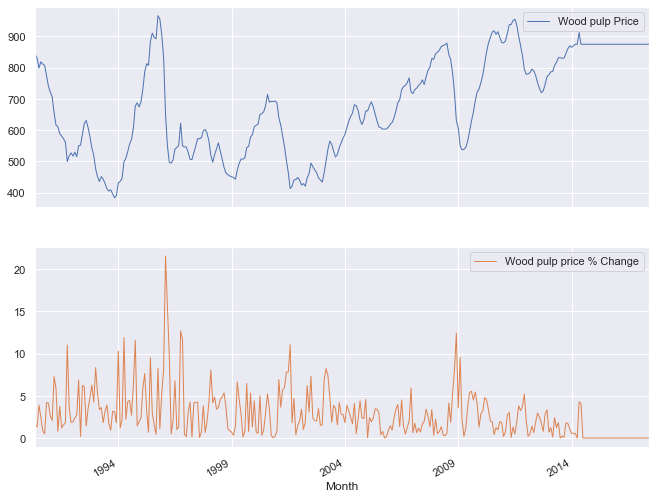

In [6]:
axes = data[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Copra Price", "Copra price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Cotton Price", "Cotton price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Fine wool Price", "Fine wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Hard log Price", "Hard log price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Hard sawnwood Price", "Hard sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Hide Price", "Hide price % change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Plywood Price", "Plywood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Rubber Price", "Rubber price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Softlog Price", "Softlog price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Soft sawnwood Price", "Soft sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
axes = data[["Wood pulp Price", "Wood pulp price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

In [7]:
percent_change = data.drop(columns = ['Coarse wool price % Change','Copra price % Change', 'Cotton price % Change',
                                      'Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change',
                                      'Plywood price % Change','Rubber price % Change','Softlog price % Change',
                                      'Soft sawnwood price % Change','Wood pulp price % Change'])

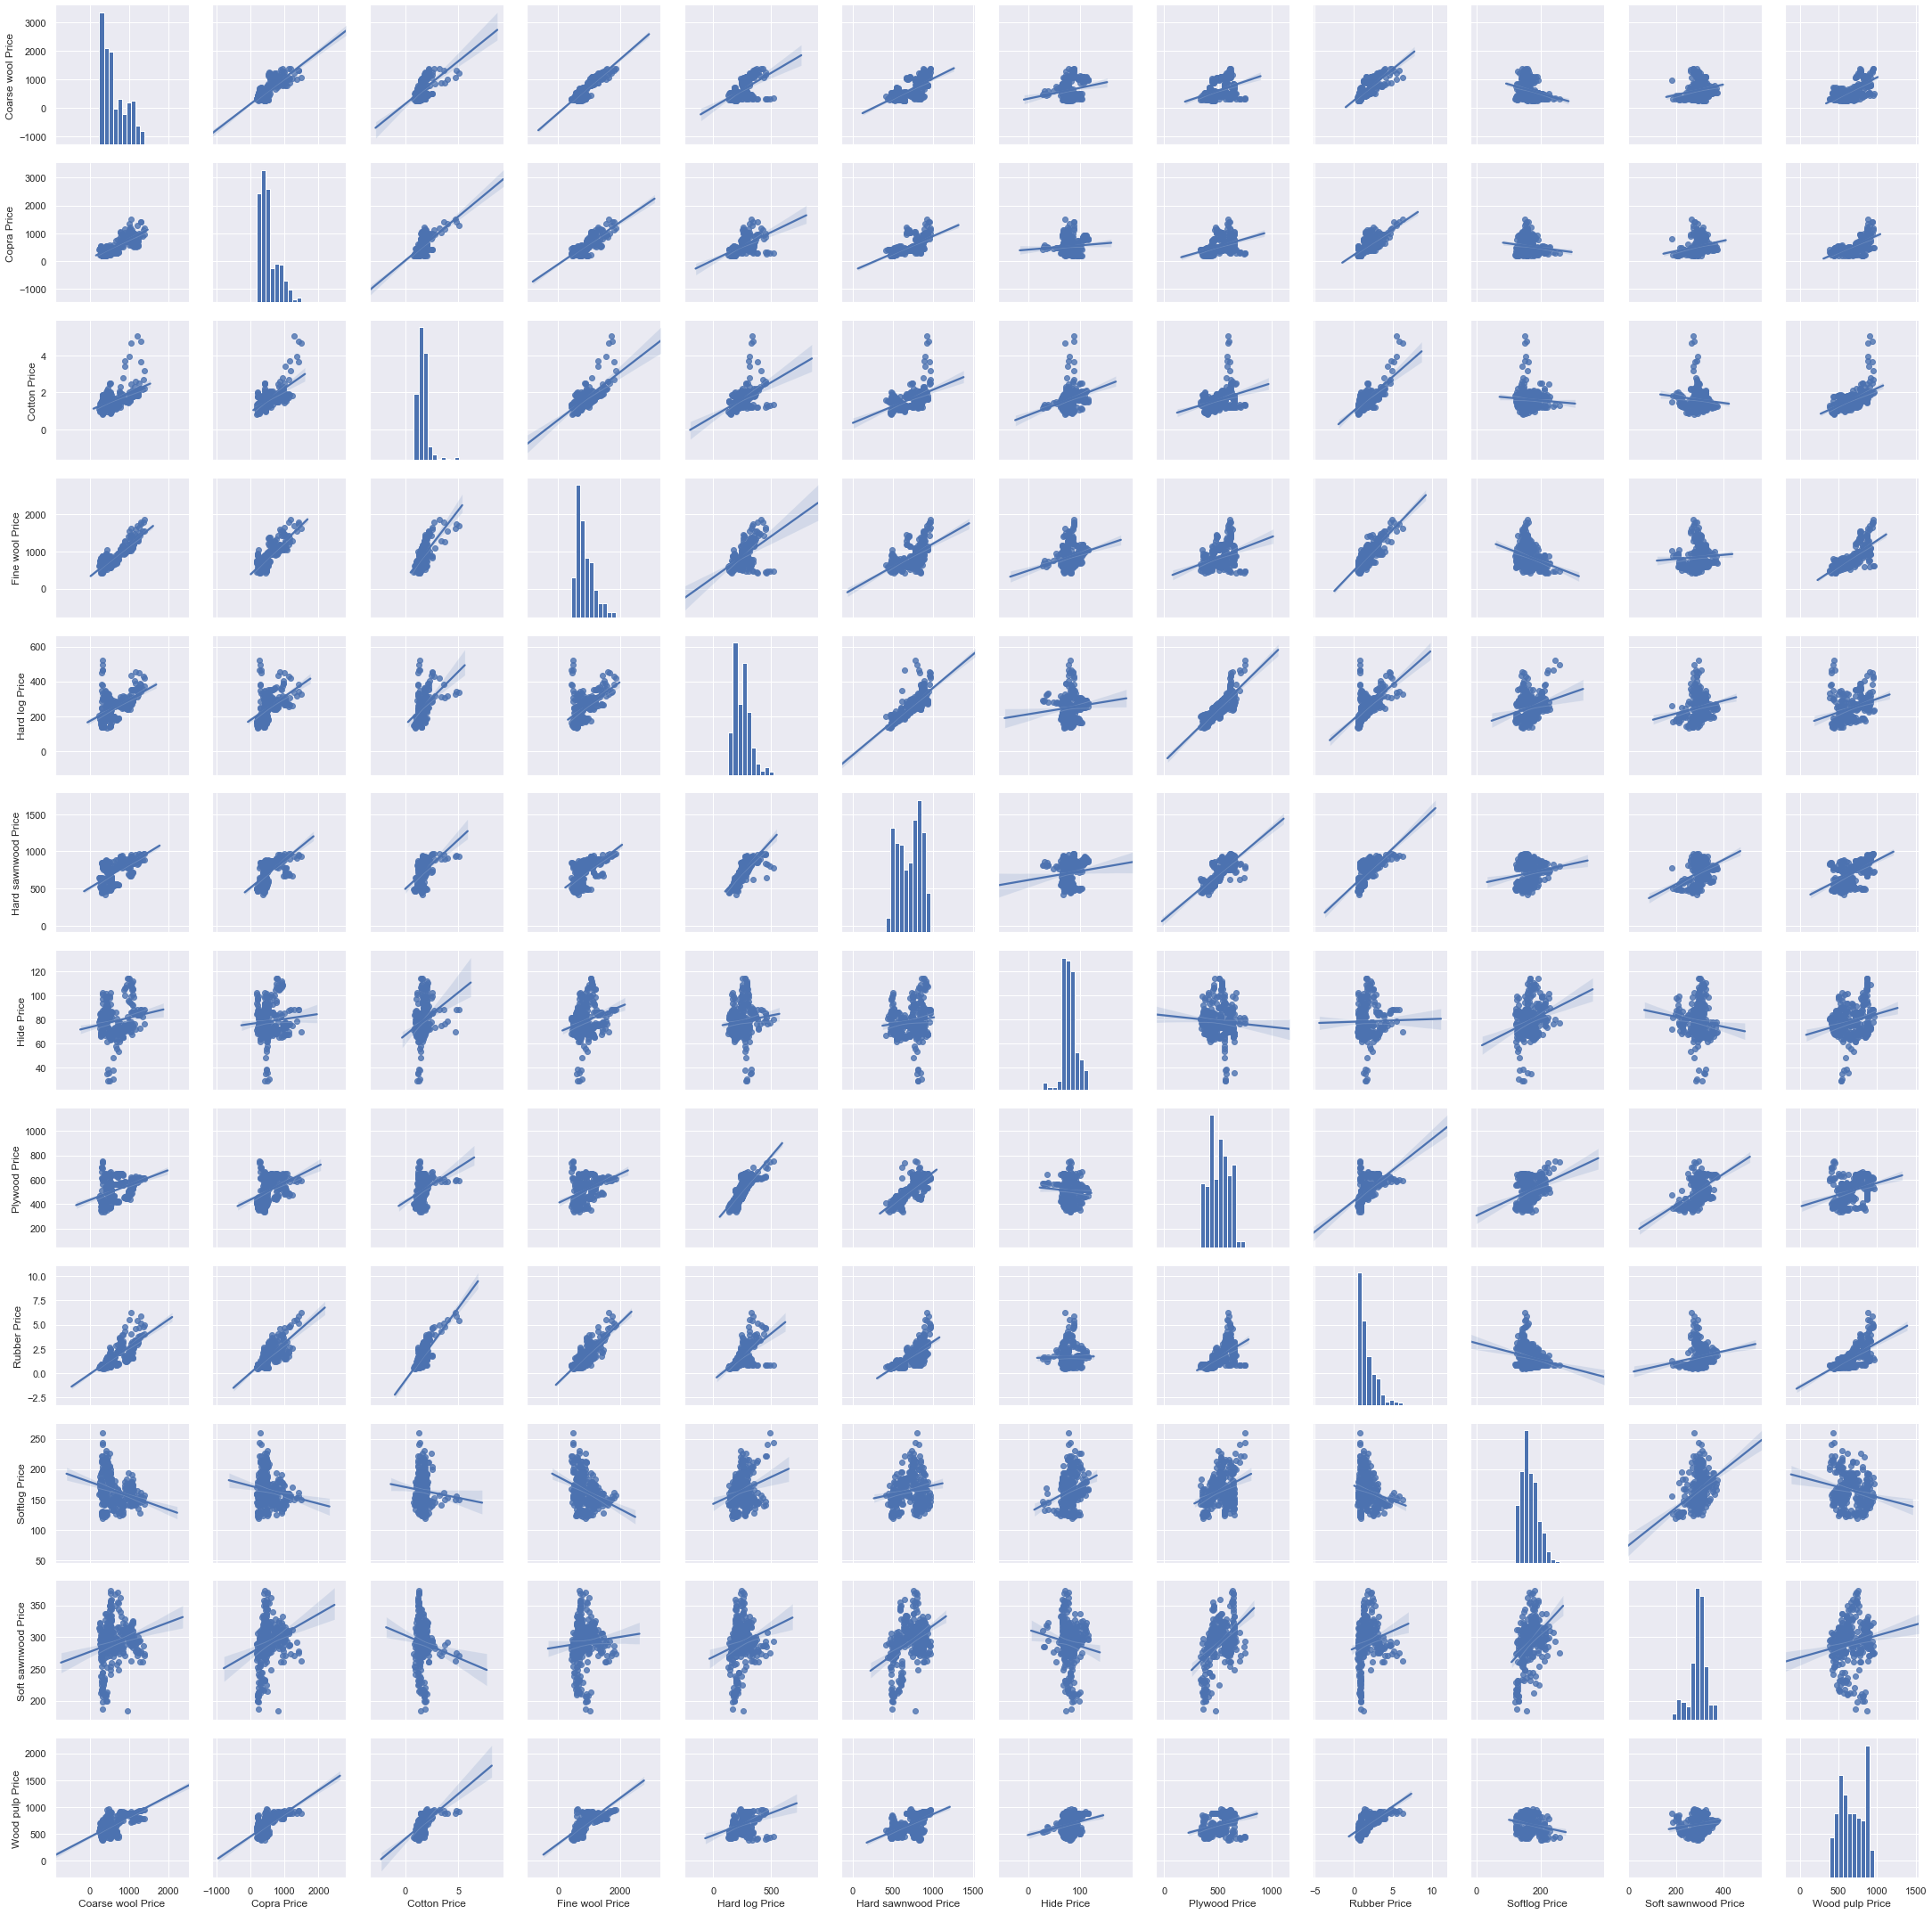

In [10]:
sns.pairplot(percent_change, kind='reg')

In [11]:
percent_change.corr()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Coarse wool Price,1.000000,0.800808,0.529220,0.894429,0.543862,0.663731,0.174090,0.394139,0.784609,-0.268047,0.204181,0.724816
Copra Price,0.800808,1.000000,0.639698,0.821941,0.522025,0.682909,0.080097,0.394724,0.759645,-0.151216,0.238552,0.717126
Cotton Price,0.529220,0.639698,1.000000,0.696877,0.475090,0.488092,0.277867,0.320203,0.743091,-0.074293,-0.111229,0.561970
Fine wool Price,0.894429,0.821941,0.696877,1.000000,0.535908,0.621634,0.224686,0.364204,0.824915,-0.297465,0.066454,0.767960
Hard log Price,0.543862,0.522025,0.475090,0.535908,1.000000,0.813274,0.097268,0.826244,0.616214,0.238008,0.182791,0.358268
Hard sawnwood Price,0.663731,0.682909,0.488092,0.621634,0.813274,1.000000,0.115024,0.789814,0.732520,0.163081,0.387273,0.586853
Hide Price,0.174090,0.080097,0.277867,0.224686,0.097268,0.115024,1.000000,-0.066666,0.017352,0.252925,-0.104656,0.220096
Plywood Price,0.394139,0.394724,0.320203,0.364204,0.826244,0.789814,-0.066666,1.000000,0.580210,0.338684,0.462562,0.329158
Rubber Price,0.784609,0.759645,0.743091,0.824915,0.616214,0.732520,0.017352,0.580210,1.000000,-0.207149,0.175388,0.670205
Softlog Price,-0.268047,-0.151216,-0.074293,-0.297465,0.238008,0.163081,0.252925,0.338684,-0.207149,1.000000,0.411879,-0.208151


In [12]:
percent_change.shape

(326, 12)

In [55]:
X = percent_change.iloc[:, 0:12].values
y = percent_change.iloc[:, 5].values

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [54]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6092378787879218
Mean Squared Error: 4.416333608030574
Root Mean Squared Error: 2.10150746085532
